In [1]:
import sys
from pathlib import Path, PurePath as PPath

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    if up:
        # NB: Path does not have a str method.
        newp = str(PPath(this_path).parent)
    else:
        newp = str(PPath(this_path)) 
    
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path: {}'.format(newp))

# if notebook inside another folder, eg ./notebooks:
nb_folder = 'notebooks'
add_to_sys_path(Path.cwd(), Path.cwd().name.startswith(nb_folder))


def get_project_dirs(which=['data', 'images'], nb_folder='notebooks'):
    dir_lst = []
    if Path.cwd().name.startswith(nb_folder):
        dir_fn = Path.cwd().parent.joinpath
    else:
        dir_fn = Path.cwd().joinpath
        
    for d in which:
        DIR = dir_fn(d)
        if not DIR.exists():
            Path.mkdir(DIR)
        dir_lst.append(DIR)
    return dir_lst

DIR_DATA, DIR_IMG = get_project_dirs()
    
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
plt.style.use('seaborn-muted')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Image

# autoreload extension
from IPython import get_ipython
ipython = get_ipython()

if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

Path added to sys.path: C:\Users\catch\Documents\GitHub\Jupyter_Sphere\Recipes


---
# Matplotlib color maps:

I refactored a portion of the guide [Choosing Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html) in order to display all categories into one compact grid plot or display one single category.

### Module import:

In [2]:
import mpl_cmaps_display as cm_display

### Public methods:

In [3]:
cm_display.__all__

['CMAPS_DICT',
 'CMAP_CAT',
 'show_cmap_cat_shortnames',
 'plot_cmap_cat',
 'plot_cmaps_grids']

### Categorical dictionnary:
(**Note:** I placed the _flag_ and _prism_ color maps into the Cyclic category.)

In [4]:
cm_display.CMAPS_DICT.keys()

odict_keys(['Sequential 1', 'Sequential 2', 'Perceptually Uniform Sequential', 'Diverging', 'Qualitative', 'Cyclic', 'Miscellaneous'])

### Data entry helper class(Enum): _CMAP_CAT_
This class is used for single category plotting.  
The class maps the dict keys to shortnames, which are accessible as methods (and intellisense detected): avoids typing, hence typos!

In [5]:
cm_display.show_cmap_cat_shortnames()

CMAP_CAT.shortname: key
              SEQ1: Sequential 1
              SEQ2: Sequential 2
              SEQ3: Perceptually Uniform Sequential
            DIVERG: Diverging
            QUALIT: Qualitative
            CYCLIC: Cyclic
              MISC: Miscellaneous


## Plotting functions:
All plots can be saved using the `save_file` argument.

### Single cmap category plotting: _plot_cmap_cat_

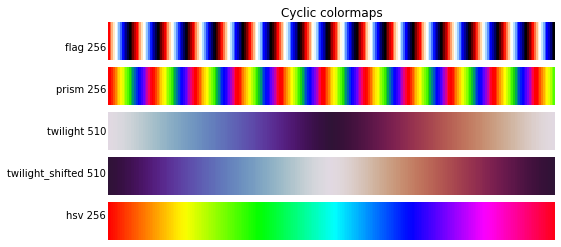

In [7]:
cm_display.plot_cmap_cat(cm_display.CMAP_CAT.CYCLIC)

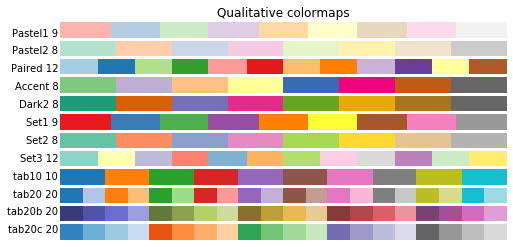

In [8]:
cm_display.plot_cmap_cat(cm_display.CMAP_CAT.QUALIT)

## All cmap categories plotting: _plot_cmaps_grids_

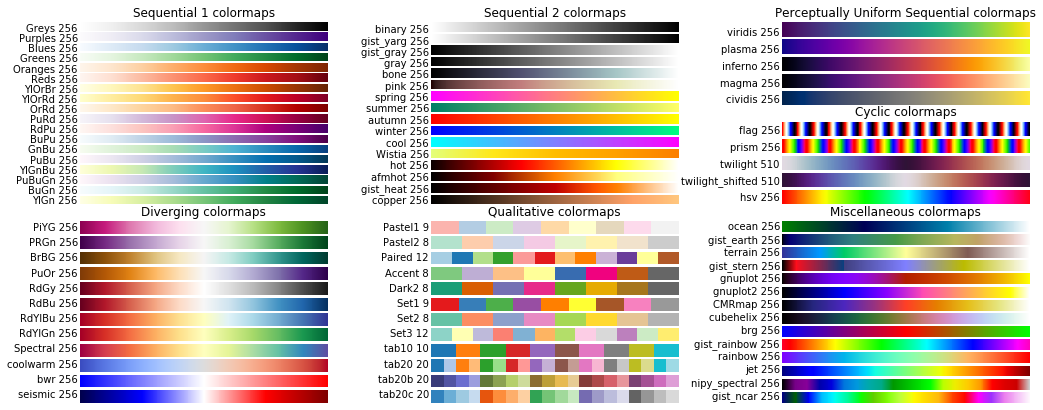

In [12]:
fname = DIR_IMG.joinpath('mpl_colormaps.png')
cm_display.plot_cmaps_grids(save_file=fname)

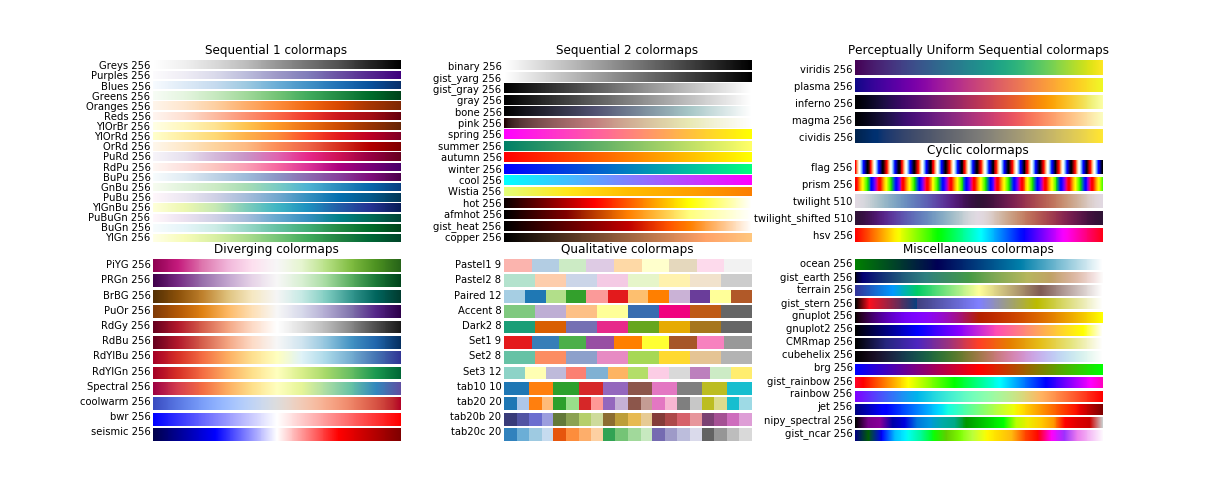

In [13]:
Image(fname)